In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob


# Video Game Recommender System: Data Processing
In this notebook, we will:
- Load and clean the video game dataset.
- Perform sentiment analysis on user reviews.
- Explore data using visualizations.

In [3]:
# Load the dataset
df = pd.read_csv('D://AIDI\AIDI 1006//Assignment 4//data//video_game_reviews.csv')

# Display the first few rows
df.head()


<>:2: SyntaxWarning: invalid escape sequence '\A'
<>:2: SyntaxWarning: invalid escape sequence '\A'
C:\Users\darsh\AppData\Local\Temp\ipykernel_34728\1080049102.py:2: SyntaxWarning: invalid escape sequence '\A'
  df = pd.read_csv('D://AIDI\AIDI 1006//Assignment 4//data//video_game_reviews.csv')


,Game Title,User Rating,Age Group Targeted,Price,Platform,Requires Special Device,Developer,Publisher,Release Year,Genre,Multiplayer,Game Length (Hours),Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players
0,Grand Theft Auto V,36.4,All Ages,41.41,PC,No,Game Freak,Innersloth,2015,Adventure,No,55.3,Medium,Average,Poor,"Solid game, but too many bugs.",Offline,1
1,The Sims 4,38.3,Adults,57.56,PC,No,Nintendo,Electronic Arts,2015,Shooter,Yes,34.6,Low,Poor,Poor,"Solid game, but too many bugs.",Offline,3
2,Minecraft,26.8,Teens,44.93,PC,Yes,Bungie,Capcom,2012,Adventure,Yes,13.9,Low,Good,Average,"Great game, but the graphics could be better.",Offline,5
3,Bioshock Infinite,38.4,All Ages,48.29,Mobile,Yes,Game Freak,Nintendo,2015,Sports,No,41.9,Medium,Good,Excellent,"Solid game, but the graphics could be better.",Online,4
4,Half-Life: Alyx,30.1,Adults,55.49,PlayStation,Yes,Game Freak,Epic Games,2022,RPG,Yes,13.2,High,Poor,Good,"Great game, but too many bugs.",Offline,1


## Data Overview
The dataset contains information about video games, including:
- Game Title
- User Ratings
- Genre
- User Review Text
- Platform, Publisher, and Release Year
- Multiplayer, Game Length, and Graphics Quality


In [4]:
# Check for missing values
df.isnull().sum()


Game Title                 0
User Rating                0
Age Group Targeted         0
Price                      0
Platform                   0
Requires Special Device    0
Developer                  0
Publisher                  0
Release Year               0
Genre                      0
Multiplayer                0
Game Length (Hours)        0
Graphics Quality           0
Soundtrack Quality         0
Story Quality              0
User Review Text           0
Game Mode                  0
Min Number of Players      0
dtype: int64

###  Scaling User Ratings

The **User Rating** values appear unusually high (e.g., `36.4`). To normalize them, we scale them to a **0-5 range** :
This ensures that all ratings are within a more conventional range.

In [6]:
# Scale ratings to a 0-5 range (if they are unusually high)
df['Scaled User Rating'] = df['User Rating'] / df['User Rating'].max() * 5

# Check the new rating scale
df[['User Rating', 'Scaled User Rating']].head()


,User Rating,Scaled User Rating
0,36.4,3.676768
1,38.3,3.868687
2,26.8,2.707071
3,38.4,3.878788
4,30.1,3.040404


##  Data Visualization

Now that our data is cleaned and processed, let's explore it through visualizations to gain deeper insights into trends and patterns. 

###  Distribution of Game Ratings
We'll plot a histogram to understand the distribution of **User Ratings** across the dataset.


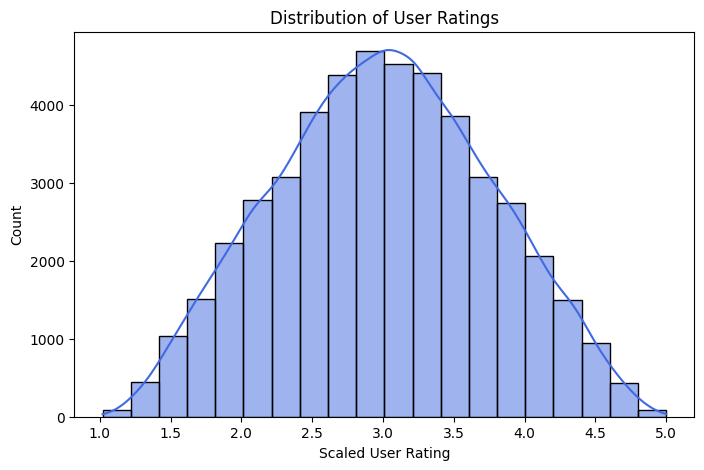

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of User Ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['Scaled User Rating'], bins=20, kde=True, color='royalblue')
plt.xlabel('Scaled User Rating')
plt.ylabel('Count')
plt.title('Distribution of User Ratings')
plt.show()

### Number of Games Released Per Year

Let's see how the number of **game releases** has changed over the years.

C:\Users\darsh\AppData\Local\Temp\ipykernel_34728\2258664893.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Release Year', palette='viridis')


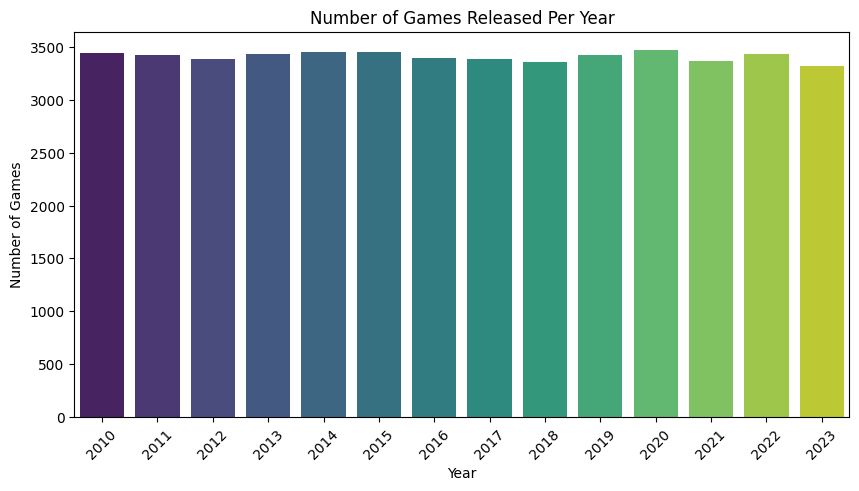

In [9]:
# Count the number of games per release year
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Release Year', palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.title('Number of Games Released Per Year')
plt.show()

### Genre Popularity

Which **game genres** are most common in our dataset? Let's visualize the distribution.

C:\Users\darsh\AppData\Local\Temp\ipykernel_34728\4073197804.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Genre'], order=df['Genre'].value_counts().index, palette='coolwarm')


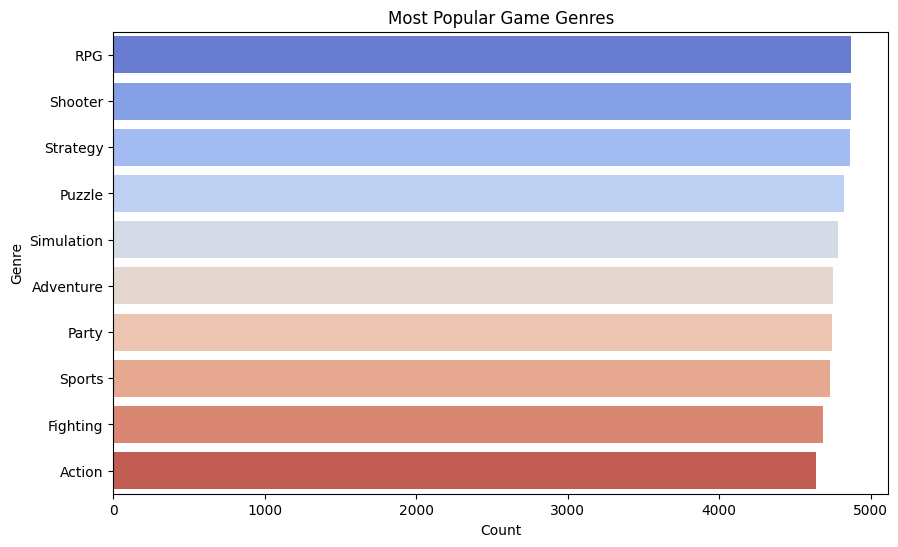

In [10]:
# Count of games per genre
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Genre'], order=df['Genre'].value_counts().index, palette='coolwarm')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Most Popular Game Genres')
plt.show()

### Top Developers by Number of Games Published

Let's find out which **developers** have published the most games.

C:\Users\darsh\AppData\Local\Temp\ipykernel_34728\1261090694.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_developers.values, y=top_developers.index, palette='magma')


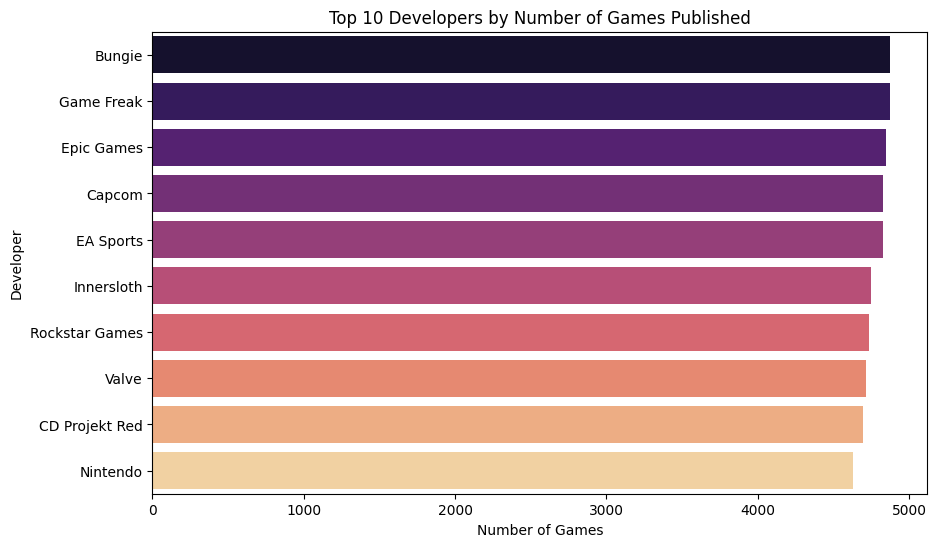

In [12]:
# Top 10 developers by game count
top_developers = df['Developer'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_developers.values, y=top_developers.index, palette='magma')
plt.xlabel('Number of Games')
plt.ylabel('Developer')
plt.title('Top 10 Developers by Number of Games Published')
plt.show()

### Save the Cleaned Data

After performing all data cleaning and transformations, let's save the cleaned dataset to a new CSV file:

In [13]:
# Save the cleaned and processed dataframe to a new CSV file
df.to_csv('D://AIDI\AIDI 1006//Assignment 4//data//cleaned_video_game_data.csv', index=False)

print("Data saved to 'cleaned_video_game_data.csv'.")


<>:2: SyntaxWarning: invalid escape sequence '\A'
<>:2: SyntaxWarning: invalid escape sequence '\A'
C:\Users\darsh\AppData\Local\Temp\ipykernel_34728\3943963478.py:2: SyntaxWarning: invalid escape sequence '\A'
  df.to_csv('D://AIDI\AIDI 1006//Assignment 4//data//cleaned_video_game_data.csv', index=False)


Data saved to 'cleaned_video_game_data.csv'.
